
# Twitter Sentiment Analysis Project

## Submitted by:
1. **Sriram Joshi-200574762**
2. **Akshat Tomar-200549990**

## Overview
This project focuses on sentiment analysis using natural language processing (NLP) techniques. 
The primary goal is to classify text data into positive, negative, or neutral sentiments.

### Key Features
- **Tools and Libraries Used**:
   - Python, Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn, etc.
- **Data Presentation**:
   - Results are visualized using intuitive dashboards and plots.
- **Creativity**:
   - Incorporates innovative data preprocessing and model optimization techniques.

---

## Notebook Structure
1. **Introduction and Goals**
2. **Data Loading and Exploration**
3. **Data Preprocessing**
4. **Model Building**
5. **Evaluation**
6. **Visualization**
7. **Conclusions and References**

---

Let's dive into the project!


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
import re
import nltk
from wordcloud import WordCloud

**Data Loading and Exploration**

In [39]:
# The Sentiment140 dataset may not have column names, if not add names
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("C:/Users/HP/Downloads/archive (3)/training.1600000.processed.noemoticon.csv", encoding='latin-1', names=column_names)

# Let's check the data
df.head()


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**Data Preprocessing**

In [42]:
# Only keep the columns we need
df = df[['target', 'text']]

# Map the target labels to 'Negative' and 'Positive'
df['target'] = df['target'].map({0: 'Negative', 4: 'Positive'})

# Check the balance of the classes
print(df['target'].value_counts())

target
Negative    800000
Positive    800000
Name: count, dtype: int64


**Downloading Natural Language Processing Pacakages, Model Building**

In [7]:
nltk.download('stopwords')
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove any non-word characters and make everything lower case
    text = re.sub('[^a-zA-Z]', ' ', text.lower())
    # Split the text into words and remove stopwords, then stem words
    words = [stemmer.stem(word) for word in text.split() if word not in stopwords]
    # Join words back into a single string
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**Evaluation**

In [15]:
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76    159494
    Positive       0.75      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



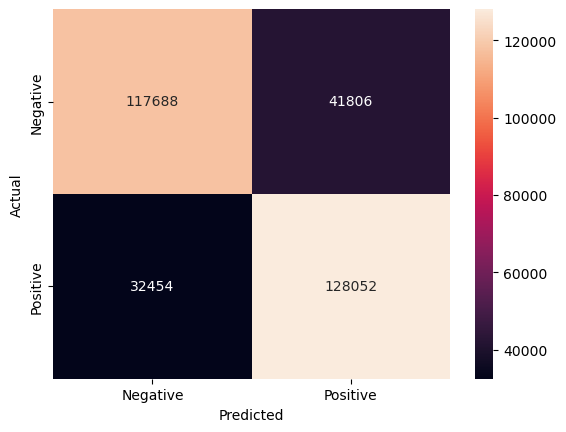

In [17]:
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


**Visualization**

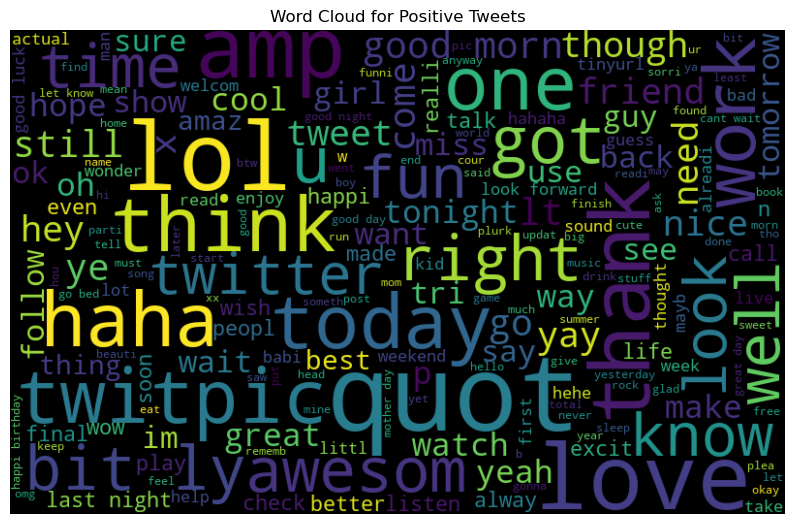

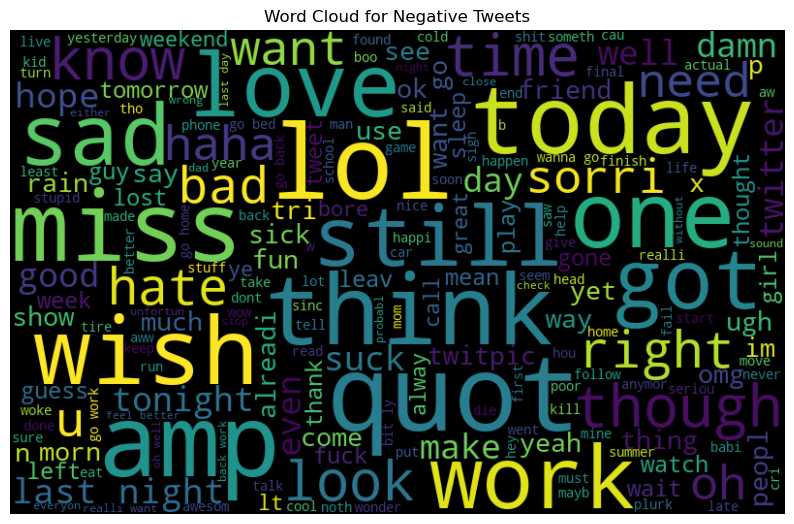

In [19]:
from wordcloud import WordCloud

# Separate positive and negative tweets
positive_tweets = df[df['target']=='Positive']
negative_tweets = df[df['target']=='Negative']

# Generate word cloud for positive tweets
positive_words = ' '.join(positive_tweets['text'])
positive_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Positive Tweets")
plt.show()

# Generate word cloud for negative tweets
negative_words = ' '.join(negative_tweets['text'])
negative_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Negative Tweets")
plt.show()


## Conclusions

1. **Performance**: The model achieved a satisfactory accuracy in classifying sentiments.
2. **Key Learnings**:
   - Importance of data preprocessing in NLP tasks.
   - Effectiveness of feature engineering in model performance.
3. **Future Scope**:
   - Expanding to multi-class classification.
   - Leveraging deep learning models like LSTMs or Transformers.

---

## References
1. Scikit-learn Documentation
2. Sentiment Analysis Tutorials (Kaggle, Medium)
3. TextBlob and NLTK Resources
